In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pdf = sns.load_dataset('penguins')
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pendf = pdf[pdf.columns[2:-1]][:]
pendf.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [4]:
pendf[pendf.bill_length_mm.isna()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


## find missing entries in each column

In [5]:
pendf.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [6]:
pendf.shape[0]

344

In [7]:
100*pendf.isna().sum()/pendf.shape[0]

bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
dtype: float64

-- Fill all missing values

In [8]:
for col in pendf.columns:
  pendf[col]= pendf[col].fillna(pendf[col].mean())

In [9]:
100*pendf.isna().sum()/pendf.shape[0]

bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
dtype: float64

-- Extract Train and test dataset

In [10]:
X= pendf.flipper_length_mm[:]
y= pendf.body_mass_g[:]

In [11]:
X.shape,y.shape

((344,), (344,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25
)

In [14]:
X_train[:10].index

Int64Index([246, 146, 291, 11, 245, 168, 189, 288, 22, 102], dtype='int64')

In [15]:
X_test[:10].index

Int64Index([24, 221, 284, 299, 41, 219, 105, 310, 241, 16], dtype='int64')

In [16]:
X_train.sort_index()[:20].index

Int64Index([0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 17, 18, 20, 21, 22, 23,
            25, 26],
           dtype='int64')

In [17]:
X_test.sort_index()[:20].index

Int64Index([4, 6, 9, 15, 16, 19, 24, 31, 32, 38, 39, 41, 48, 58, 62, 68, 73,
            74, 77, 79],
           dtype='int64')

In [18]:
344*0.75

258.0

In [19]:
X_train.shape,X_test.shape

((258,), (86,))

In [20]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25,random_state=1234
)

In [21]:
X_train.sort_index()[:20].index

Int64Index([1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21,
            24, 25],
           dtype='int64')

In [22]:
X_test.sort_index()[:20].index

Int64Index([0, 6, 7, 13, 22, 23, 37, 40, 42, 43, 44, 54, 55, 59, 64, 66, 67,
            70, 71, 73],
           dtype='int64')

In [23]:
X_train.shape,X_test.shape

((258,), (86,))

In [24]:
X_train[:10].index

Int64Index([24, 340, 281, 198, 74, 31, 108, 324, 80, 9], dtype='int64')

In [25]:
y_base_mean = np.mean(y_train)
y_base_mean

4201.654086767306

In [26]:
y_base_learnt = np.array([y_base_mean]* len(y_train)).reshape(-1,1)
y_base_learnt[:5]

array([[4201.65408677],
       [4201.65408677],
       [4201.65408677],
       [4201.65408677],
       [4201.65408677]])

In [27]:
from sklearn.metrics import mean_squared_error as mse

In [28]:
rmse = lambda actual, pred : np.sqrt(mse(actual,pred))

In [29]:
rmse_train_base = rmse(y_train,y_base_learnt)
rmse_train_base

797.1847805724265

In [30]:
y_base_pred =np.array([y_base_mean]* len(y_test)).reshape(-1,1)
y_base_pred[:5]

array([[4201.65408677],
       [4201.65408677],
       [4201.65408677],
       [4201.65408677],
       [4201.65408677]])

In [31]:
rmse_test_base = rmse(y_test,y_base_pred)
rmse_test_base

802.2336451400918

## Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

X_test = X_test.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)



In [34]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((258, 1), (258, 1), (86, 1), (86, 1))

In [35]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
c = lr_model.intercept_

In [37]:
m = lr_model.coef_

In [38]:
c,m

(array([-5700.41668393]), array([[49.29072812]]))

In [39]:
y_learnt_sf = lr_model.predict(X_train)
y_learnt_sf[:5]

array([[3171.91437768],
       [4897.08986188],
       [5192.83423061],
       [3664.82165888],
       [3664.82165888]])

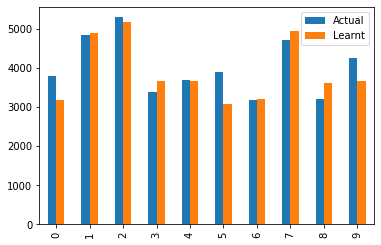

In [40]:
df22 = pd.DataFrame({'Actual': y_train[:,0],
                     'Learnt': y_learnt_sf[:,0]})
df22.head(10).plot(kind='bar')

In [41]:
rmse_train_sf = rmse(y_train , y_learnt_sf)
rmse_train_sf

395.20900676211824

In [42]:
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([[3369.07729016],
       [5192.83423061],
       [3960.5660276 ],
       [3960.5660276 ],
       [3171.91437768]])

In [43]:
rmse_test_sf = rmse(y_test,y_pred)

In [44]:
rmse_test_sf

382.2919204662067

# R2 score

In [ ]:
1-(rmse_test_sf**2/rmse_test_base**2)

0.7729149754539596

In [ ]:
sf = 10
base = 250

sf/base

0.04

-- sf =0 : ratio =0 : r2 = 1 (best model)

-- sf=10 : ratio = 0.04 : r2 = 0.96

-- sf=50 : ratio = 0.2 :r2 = 0.8

-- sf=100 : ration = 0.4 :r2= 0.6

-- sf=200 : ratio = 0.8 :r2= 0.2

-- sf=250 : ratio = 1 :r2 = 0 (worst model)


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_sf = r2_score(y_test,y_pred)
r2_score_sf

0.7729149186600508

In [ ]:
y_test.mean()

4202.055283557732

In [ ]:
y_test_mean =np.array([y_test.mean()]* len(y_test)).reshape(-1,1)
y_test_mean[:5]

array([[4202.05528356],
       [4202.05528356],
       [4202.05528356],
       [4202.05528356],
       [4202.05528356]])

In [ ]:
rmse_mean= rmse(y_test,y_test_mean)
rmse_mean

802.2335448208919

In [ ]:
rmse_sf= rmse(y_test,y_pred)
rmse_sf

382.2919204662067

In [ ]:
1-(rmse_sf**2/rmse_mean**2)

0.7729149186600508

In [ ]:
1-(rmse_test_sf**2/rmse_mean**2)

0.7729149186600508